In [1]:
# age first funding year is the age of the company in years since it got first funding. similar for age last funding year.

# milestonefor any startup is a tracking mark for startups. Just like a milestone on the side of a road marks how
#far you've gone, a milestone in startups tracks progress as an startup grow and implement their plan.

# relationships- it says how many relationship does a startup have. For example a start up can have 
#relationships with accountants, investors, vendors, mentors, etc.

#funding rounds for an startup can be better understood here: https://www.forbes.com/sites/alejandr
#ocremades/2018/12/26/how-funding-rounds-work-for-startups/?sh=57858cc73866

<div style="padding:25px;color:black;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra">Imports</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('startup dataog.csv')

In [4]:
c_data=data.copy()
data.head(5)


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [5]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

<div style="padding:25px;color:black;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra">Data preprocessing</div>

In [7]:
df_cat=data.select_dtypes(include=object)
df_cat.head()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,01-01-2007,NaN,04-01-2009,01-01-2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-2010,10-01-2012,08-01-2010,04-01-2012,CA,games_video,c:65806,closed


In [8]:
data['status']=data['status'].map({'acquired':1,'closed':0})

In [9]:
data

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,1
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,0
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,0
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,1


missing value

In [10]:
missing=pd.DataFrame(data.isna().sum(),columns=['null value'])
missing['% nulll value']=(data.isna().sum()/len(data)*100)
missing=missing[missing['null value']>0]
missing.style.background_gradient(cmap='viridis',low=1)


,null value,% nulll value
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


Handling missing value unnamed 6

In [11]:
data['Unnamed: 6']=data.apply(lambda row:(row.city)+' '+(row.state_code)+' '+(row.zip_code),axis=1)

In [12]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [13]:
data.shape

(923, 34)

In [14]:
data['Unnamed: 6'].isna().sum()

0

Handling missing value closed_at

In [15]:
data['closed_at']=data['closed_at'].fillna('31/12/2013')

In [16]:
data['closed_at'].isna().sum()

0

Handling missing value age_first_milstone_year and age_last_milstone_year

In [17]:
data[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [18]:
data['age_first_milestone_year']=data['age_first_milestone_year'].fillna(0)
data['age_last_milestone_year']=data['age_last_milestone_year'].fillna(0)

In [19]:
data[['age_first_milestone_year','age_first_milestone_year']].isna().sum()

age_first_milestone_year    0
age_first_milestone_year    0
dtype: int64

checking null values again

In [20]:
data.drop('state_code.1',axis=1,inplace=True)

In [21]:
data.isna().sum()

Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
Unnamed: 6                  0
name                        0
labels                      0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
category_code               0
object_id                   0
has_VC                      0
has_angel                   0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_participants            0
is_top500                   0
status                      0
dtype: int

In [22]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'category_code', 'object_id',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

unique values from each columns

In [23]:
columns=['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at','name','city','category_code','status','milestones','relationships','funding_rounds','is_top500']


In [24]:
columns

['founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'name',
 'city',
 'category_code',
 'status',
 'milestones',
 'relationships',
 'funding_rounds',
 'is_top500']

In [25]:
for i,col in enumerate(columns):
    unique=data[col].nunique()
    print(f'{i} ->  {col}     :{unique}'.format(i,col,unique))

0 ->  founded_at     :217
1 ->  closed_at     :203
2 ->  first_funding_at     :585
3 ->  last_funding_at     :680
4 ->  name     :922
5 ->  city     :221
6 ->  category_code     :35
7 ->  status     :2
8 ->  milestones     :8
9 ->  relationships     :41
10 ->  funding_rounds     :9
11 ->  is_top500     :2


# categorical data

category_code

In [26]:
df=pd.get_dummies(data['category_code'])


In [27]:
data.category_code.value_counts()

software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
ecommerce            25
public_relations     25
cleantech            23
security             19
analytics            19
social               14
search               12
other                11
messaging            11
fashion               8
travel                8
news                  8
medical               7
photo_video           7
music                 6
finance               6
education             4
consulting            3
real_estate           3
health                3
automotive            2
manufacturing         2
transportation        2
hospitality           1
sports                1
Name: category_code, dtype: int64

In [28]:
selected_data1=df[['software','web','mobile','enterprise','advertising','games_video','semiconductor','biotech',
    'network_hosting','ecommerce','hardware']]

In [29]:
selected_data1.head()

,software,web,mobile,enterprise,advertising,games_video,semiconductor,biotech,network_hosting,ecommerce,hardware
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


In [30]:
others1=df.drop(selected_data1,axis=1)
list1=[]
for i in range(len(others1)):
    sum1=others1.iloc[i].sum()
    list1.append(sum1)
    

In [31]:
len(list1)

923

In [32]:
data=data.join(df[['software','web','mobile','enterprise','advertising','games_video','semiconductor','biotech',
    'network_hosting','ecommerce','hardware']])
data['other_category']=list1

In [33]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,mobile,enterprise,advertising,games_video,semiconductor,biotech,network_hosting,ecommerce,hardware,other_category
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,0,0,0,0,0,0,0,0,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,0,1,0,0,0,0,0,0,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,0,0,0,0,0,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,0,0,0,0,0,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,0,0,0,1,0,0,0,0,0,0


state_code

In [34]:
df1=pd.get_dummies(data['state_code'])
selected_data2=df1[['CA','NY','MA','TX','WA']]
selected_data2

,CA,NY,MA,TX,WA
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
918,1,0,0,0,0
919,0,0,1,0,0
920,1,0,0,0,0
921,1,0,0,0,0


In [35]:
data.state_code.value_counts()

CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: state_code, dtype: int64

In [36]:
others2=df1.drop(selected_data2,axis=1)

list2=[]
for i in range(len(others2)):
    sum=others2.iloc[i].sum()
    list2.append(sum)
    

In [37]:
len(list2)

923

In [38]:

data=data.join(df1[['CA','NY','MA','TX','WA']])
data['other_state']=list2

In [39]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,network_hosting,ecommerce,hardware,other_category,CA,NY,MA,TX,WA,other_state
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,0,0,0,1,1,0,0,0,0,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,0,0,0,0,1,0,0,0,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,0,0,1,0,0,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,0,0,1,0,0,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
data.drop(['category_code','state_code'],axis=1,inplace=True)

removing all unnecessary columns

In [41]:
data.drop(['Unnamed: 0','Unnamed: 6','latitude',
           'closed_at','longitude','zip_code','id','labels','age_first_milestone_year',
           'age_last_milestone_year','object_id'],axis=1,inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    923 non-null    object 
 1   name                    923 non-null    object 
 2   founded_at              923 non-null    object 
 3   first_funding_at        923 non-null    object 
 4   last_funding_at         923 non-null    object 
 5   age_first_funding_year  923 non-null    float64
 6   age_last_funding_year   923 non-null    float64
 7   relationships           923 non-null    int64  
 8   funding_rounds          923 non-null    int64  
 9   funding_total_usd       923 non-null    int64  
 10  milestones              923 non-null    int64  
 11  has_VC                  923 non-null    int64  
 12  has_angel               923 non-null    int64  
 13  has_roundA              923 non-null    int64  
 14  has_roundB              923 non-null    in

# correlation heatmap

In [43]:
corr_data=data.drop(selected_data1.columns,axis=1)
corr_data=corr_data.drop(selected_data2.columns,axis=1)

<AxesSubplot:>

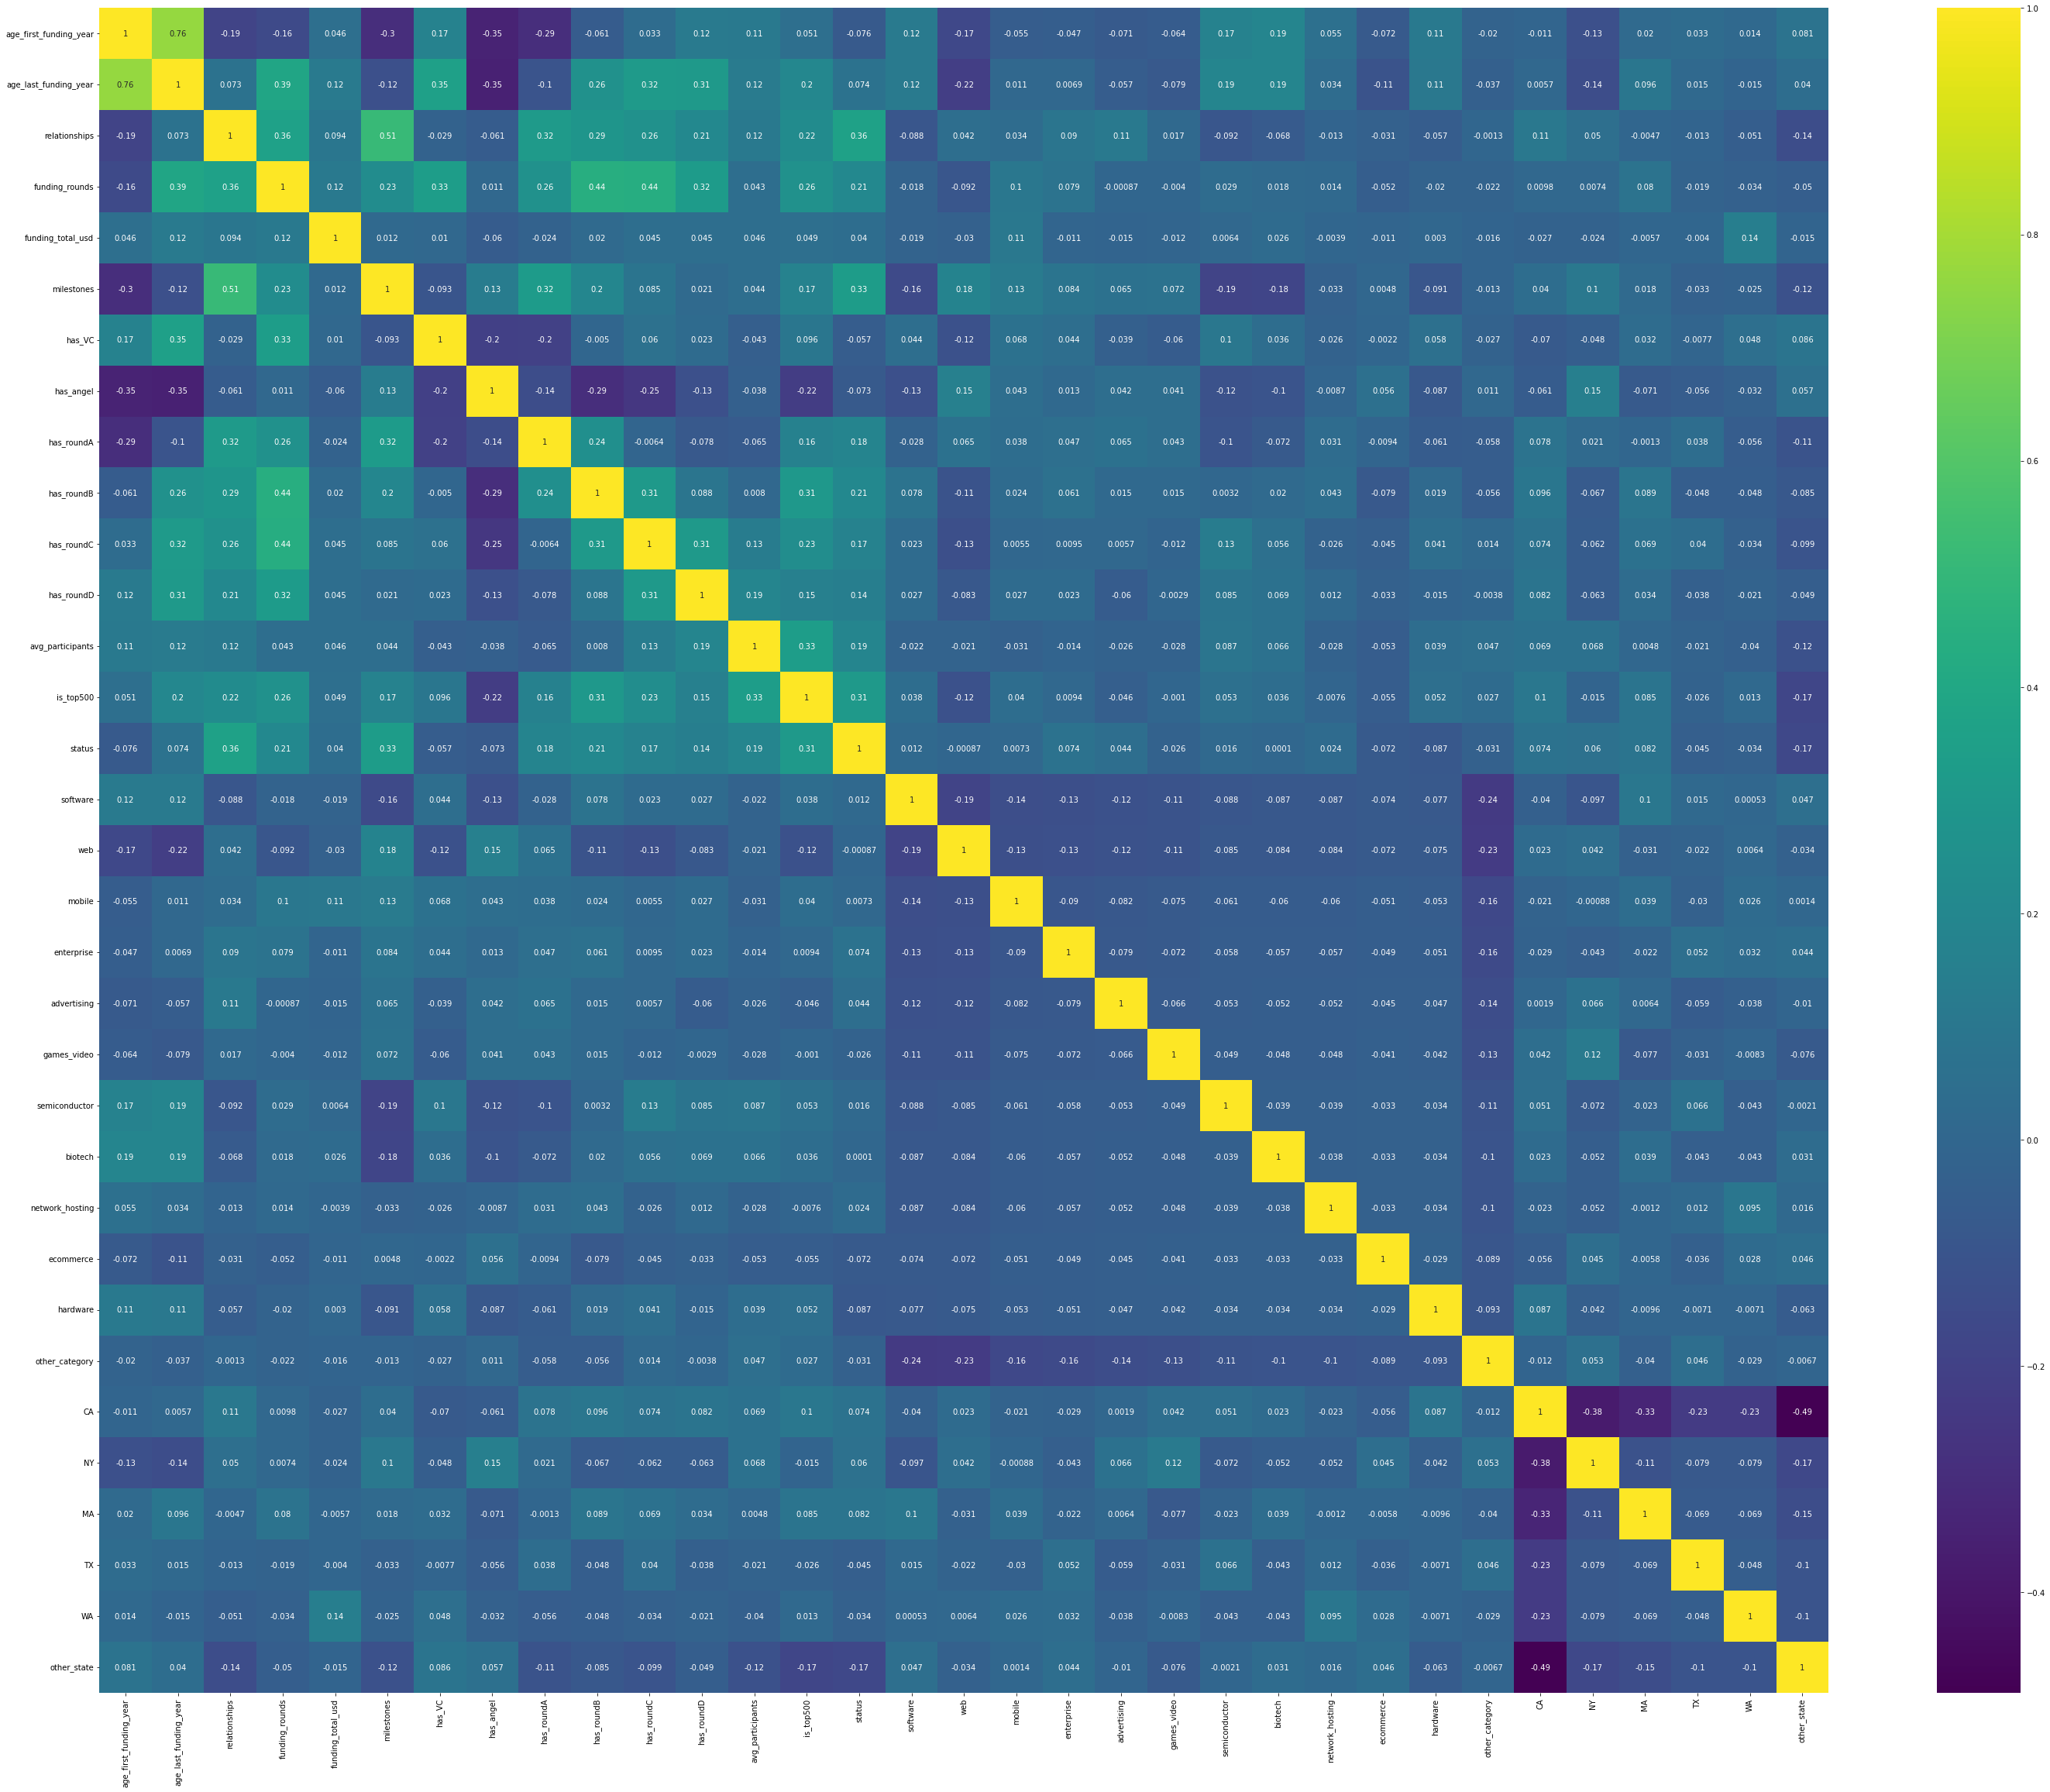

In [44]:
correlation=data.corr()
plt.figure(figsize=(50,40))
sns.heatmap(correlation,cmap='viridis',annot=True)

<div style="padding:25px;color:black;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra">Data visualization</div>

how many startup are aquired or closed

In [45]:
df_aq=data[data['status']==1]
df_aq.shape

(597, 38)

In [46]:
df_cl=data[data['status']==0]
df_cl.shape

(326, 38)

In [47]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D4C8BA","figure.facecolor":"#D4C8BA"})
sns.set_context("poster",font_scale = .7)


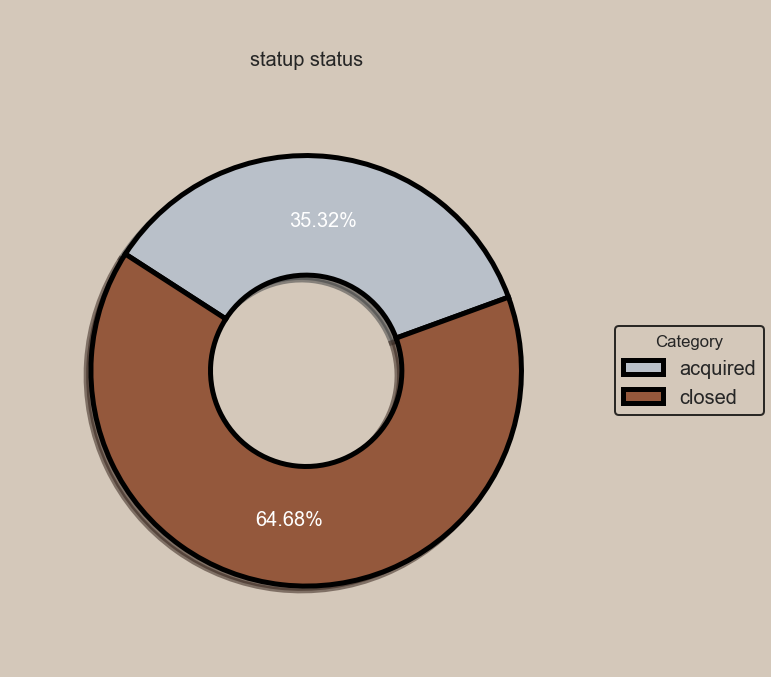

In [48]:
plt.figure(figsize=(11,11))
labels='acquired','closed'
wedges, texts, autotexts=plt.pie([data['status'].value_counts()[0],
         data['status'].value_counts()[1]],
         textprops=dict(size= 20, color= "white"),
         autopct="%.2f%%",
         pctdistance = 0.7,
         radius=.9, 
         colors = ["#B9C0C9","#94583C"], 
         shadow = True,
         startangle = 20,
        wedgeprops=dict(width = 0.5, edgecolor = "black",linewidth = 5))
plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=( 1,0, 0.5, 1), edgecolor = "black",fontsize=20)
plt.title("\n\nstatup status",fontsize=20);
plt.show()

which category have the largest number of startup

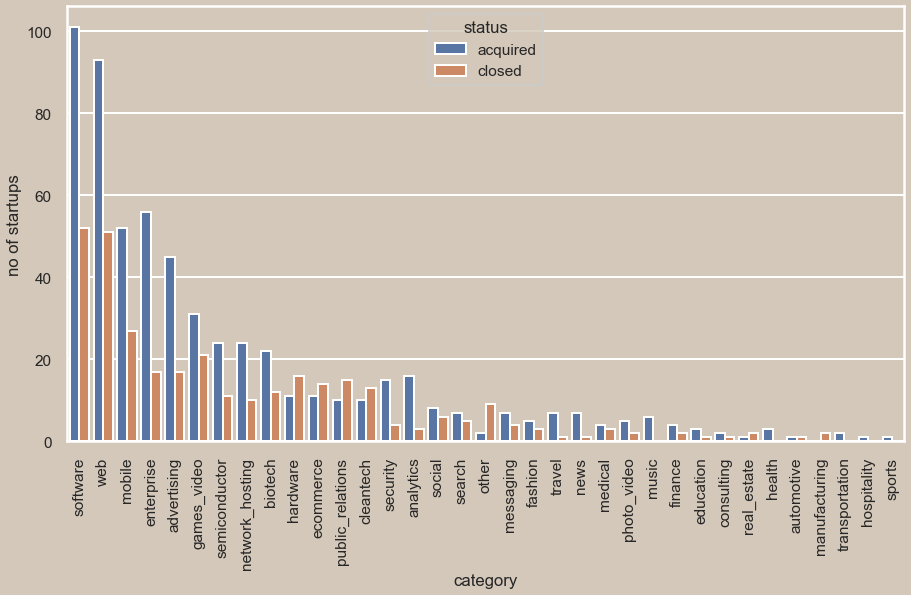

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(x='category_code',hue='status',data=c_data,order=c_data.category_code.value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('no of startups')
plt.xlabel('category')
plt.show()


In [50]:
le=LabelEncoder()
list=(data.select_dtypes(include=object)).columns
for i in list:
    data[i]=le.fit_transform(data[i])

In [51]:
data.dtypes

city                        int32
name                        int32
founded_at                  int32
first_funding_at            int32
last_funding_at             int32
age_first_funding_year    float64
age_last_funding_year     float64
relationships               int64
funding_rounds              int64
funding_total_usd           int64
milestones                  int64
has_VC                      int64
has_angel                   int64
has_roundA                  int64
has_roundB                  int64
has_roundC                  int64
has_roundD                  int64
avg_participants          float64
is_top500                   int64
status                      int64
software                    uint8
web                         uint8
mobile                      uint8
enterprise                  uint8
advertising                 uint8
games_video                 uint8
semiconductor               uint8
biotech                     uint8
network_hosting             uint8
ecommerce     

# split

In [52]:
data.columns

Index(['city', 'name', 'founded_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'software', 'web', 'mobile',
       'enterprise', 'advertising', 'games_video', 'semiconductor', 'biotech',
       'network_hosting', 'ecommerce', 'hardware', 'other_category', 'CA',
       'NY', 'MA', 'TX', 'WA', 'other_state'],
      dtype='object')

In [53]:
x=data.drop(['status','city','name','CA','NY','MA','TX','WA','other_state','founded_at','first_funding_at','last_funding_at'],axis=1)
y=data['status']

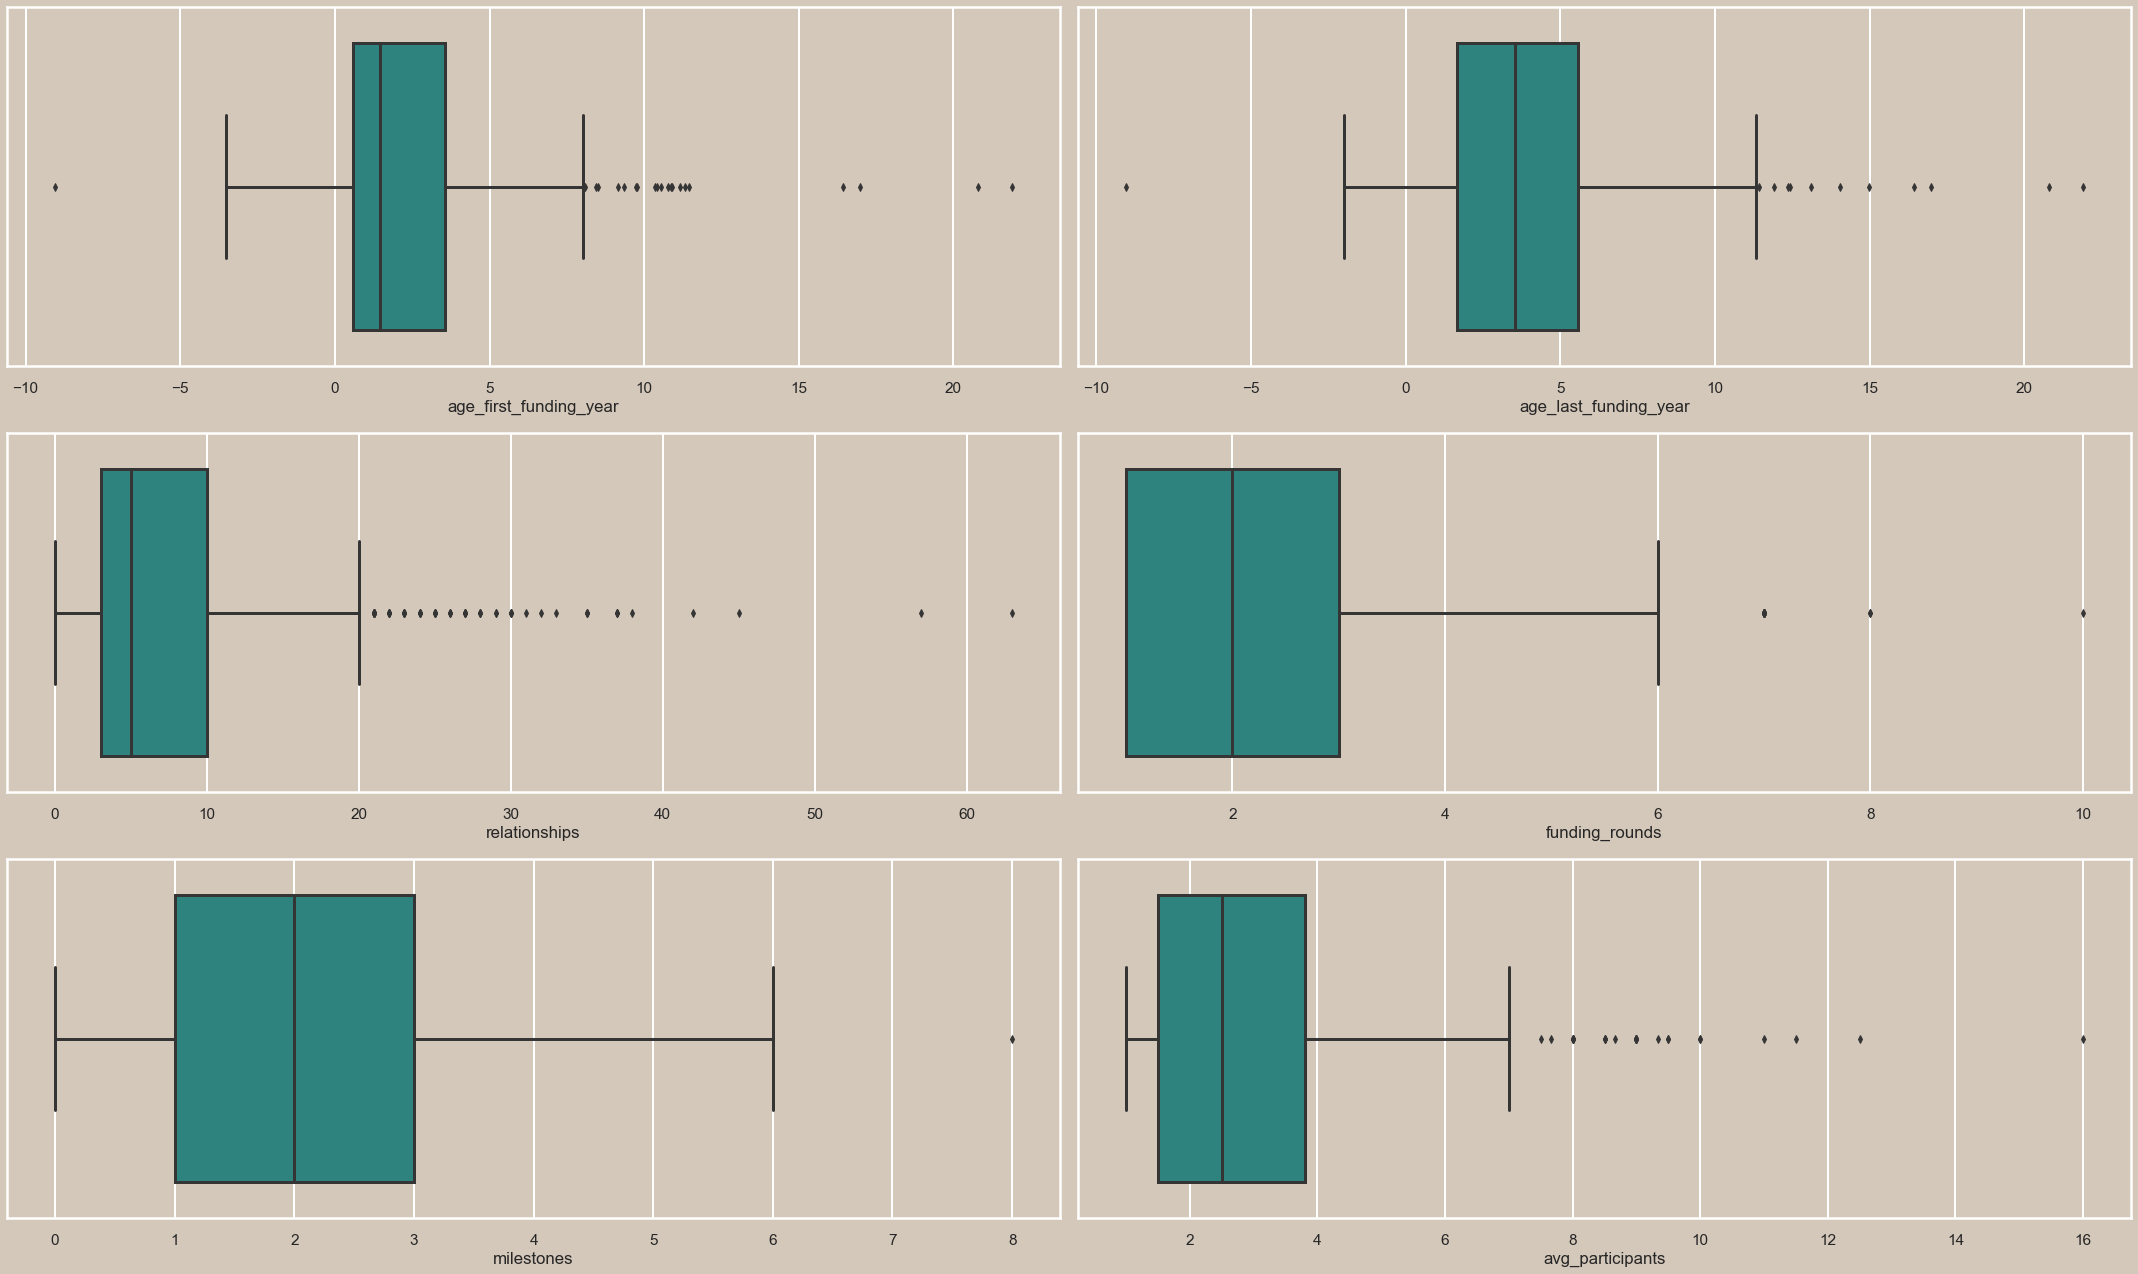

In [54]:
list=['age_first_funding_year','age_last_funding_year','relationships','funding_rounds','milestones','avg_participants']
plt.figure(figsize=(30,18))
for i,col in enumerate(list):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[col],palette="viridis")
plt.tight_layout()
plt.show()

In [55]:
import numpy as np
for i in list:
    q1,q3=np.percentile(data[i],[25,75])
    iqr=q3-q1
    lower=q1-(iqr*1.5)
    upper=q3+(iqr*1.5)
    data[i]= np.where(data[i]>upper,upper,np.where(data[i]<lower,lower,data[i]))

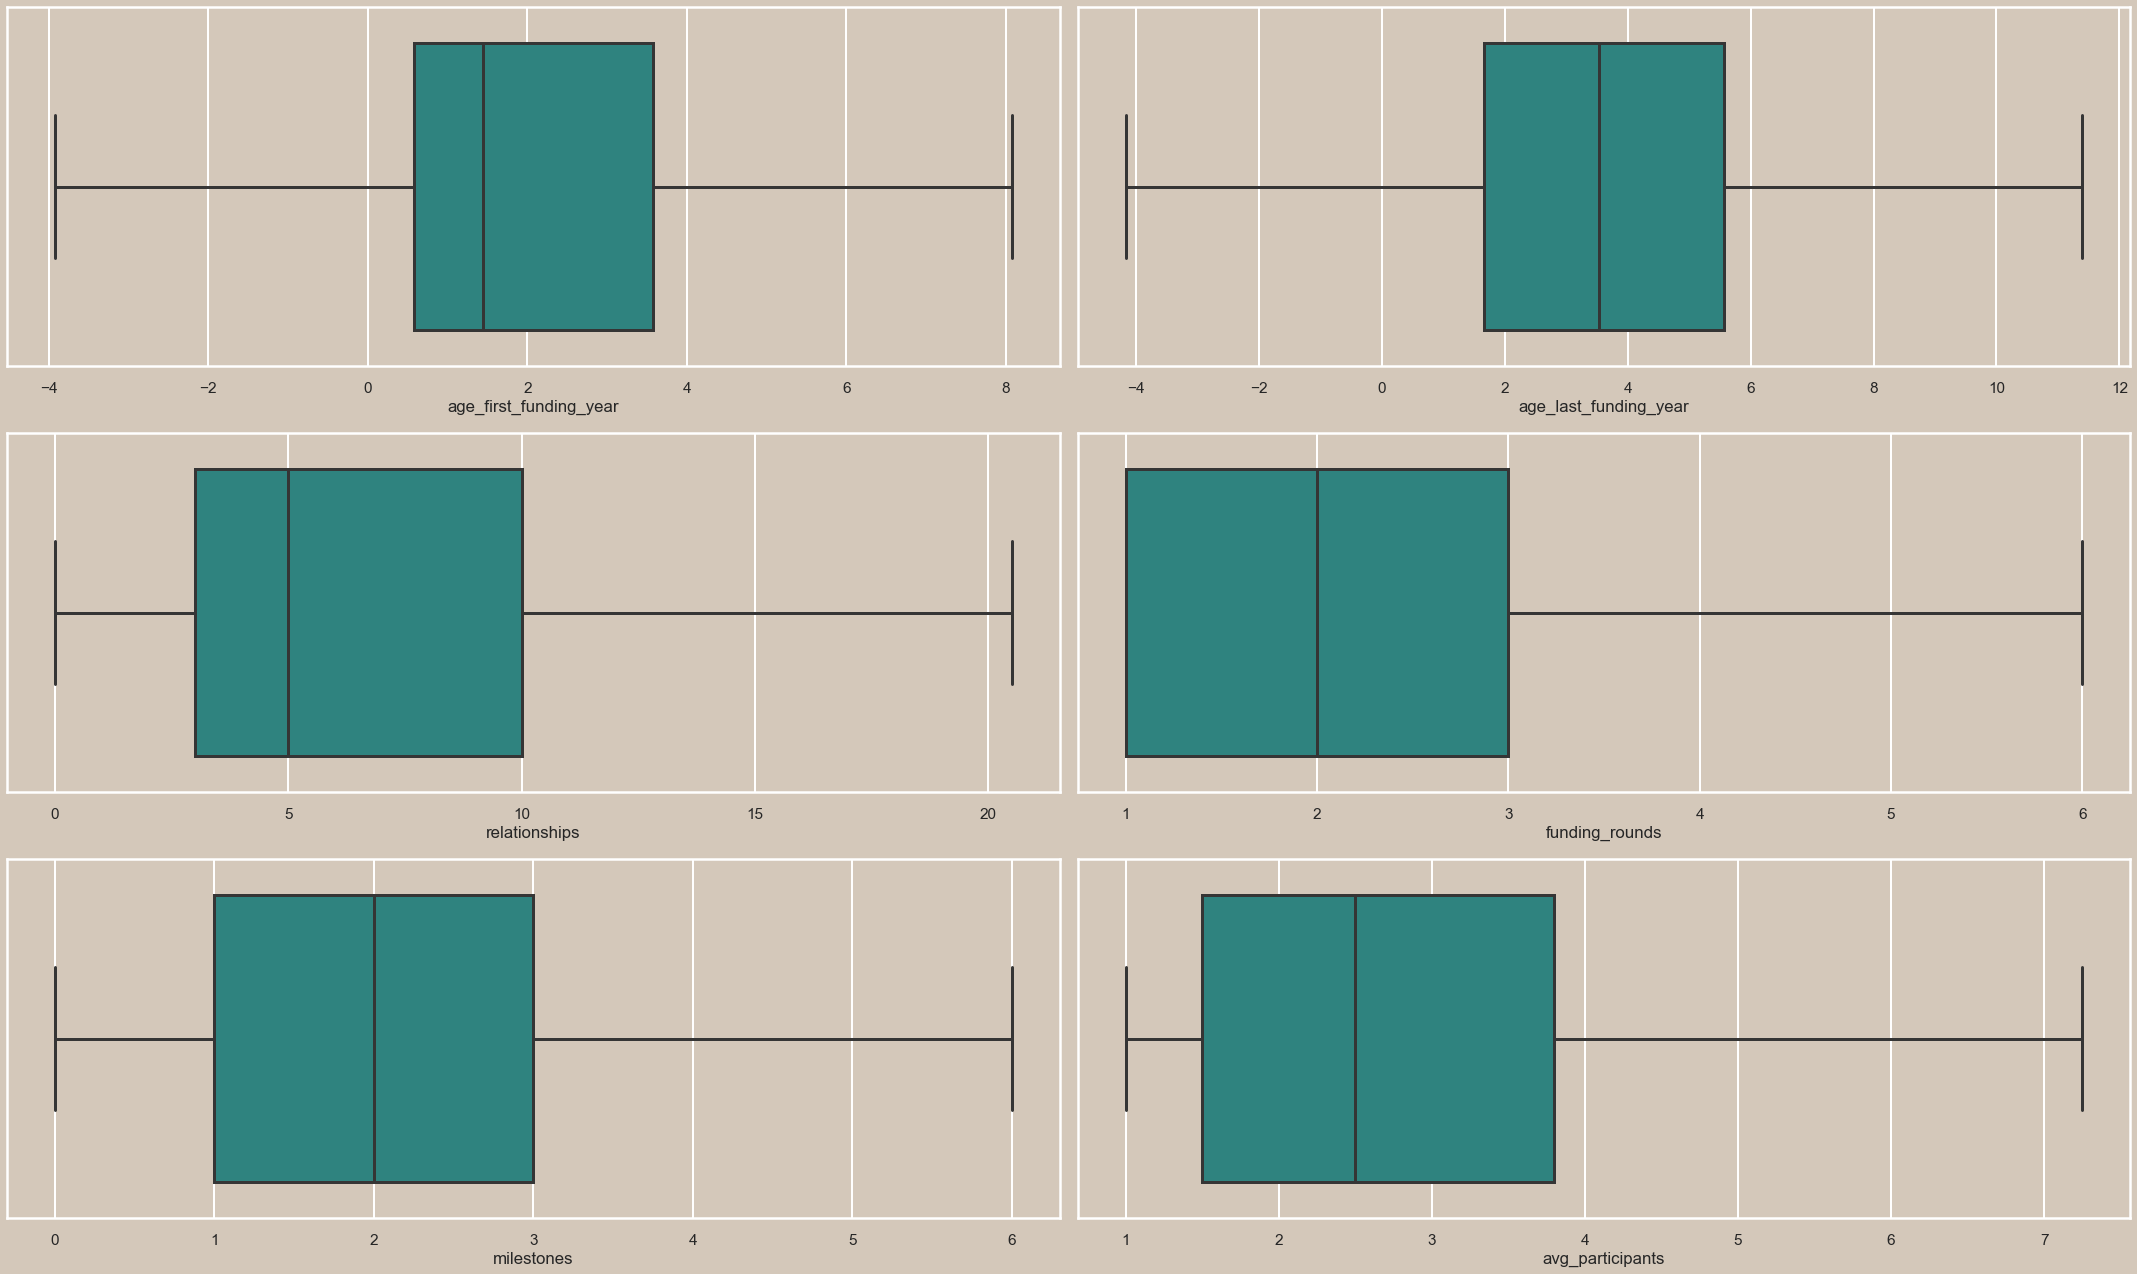

In [56]:
list=['age_first_funding_year','age_last_funding_year','relationships','funding_rounds','milestones','avg_participants']
plt.figure(figsize=(30,18))
for i,col in enumerate(list):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[col],palette='viridis')
plt.tight_layout()
plt.show()

In [57]:
x.columns

Index(['age_first_funding_year', 'age_last_funding_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'software', 'web', 'mobile',
       'enterprise', 'advertising', 'games_video', 'semiconductor', 'biotech',
       'network_hosting', 'ecommerce', 'hardware', 'other_category'],
      dtype='object')

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(738, 26)
(738,)
(185, 26)


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)

<div style="padding:25px;color:black;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra">Model selection</div>

In [62]:
t_model={'Logisticregression':{'model':LogisticRegression(),'param':{'C':[1,2,3]}},
        'Randomforest':{'model':RandomForestClassifier(),'param':{'n_estimators':[28,32,38,44,46,50,36,48,49,42]}},
       'Decisiontree':{'model':DecisionTreeClassifier(),'param':{'max_depth':[1,4,7,10,2,16]}},
        'Adaboosting':{'model':AdaBoostClassifier(),'param':{'n_estimators':[10,40,50,70,28],
                     'learning_rate':[0.2,0.3,0.5,0.7],'random_state':
                                                            [20,30,40,100,200]}}}

In [63]:
models=['Logisticregression','Randomforest','Decisiontree','Adaboosting']
scores=[]
for i in models:
    mp=t_model[i]
    gds=GridSearchCV(mp['model'],mp['param'],return_train_score=True,cv=5)
    gds.fit(x_train,y_train)
    scores.append({'model':i,'best_score':gds.best_score_,'best_parameter':gds.best_params_})

In [64]:
score=pd.DataFrame(scores)
score

,model,best_score,best_parameter
0,Logisticregression,0.635503,{'C': 1}
1,Randomforest,0.793997,{'n_estimators': 28}
2,Decisiontree,0.753392,{'max_depth': 7}
3,Adaboosting,0.808917,"{'learning_rate': 0.7, 'n_estimators': 28, 'ra..."


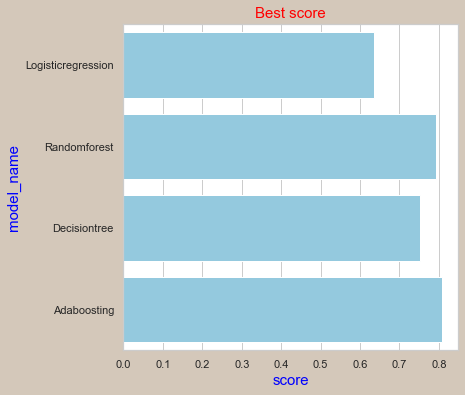

In [65]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.barplot(y='model',x='best_score',data=score,color='skyblue')

plt.ylabel('model_name',fontdict={'fontsize':15},color='blue')
plt.xlabel('score',fontdict={'fontsize':15},color='blue')
plt.title('Best score',fontdict={'fontsize':15},color='red')
plt.show()

In [66]:
from sklearn.svm import SVC


In [67]:
# model=SVC(gamma='scale',C=3,random_state=200,kernel='linear',degree=10)
# model.fit(x_train,y_train)
# model.score(x_test,y_test)

<div style="padding:25px;color:black;margin:0;font-size:210%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra"> Model Evaluation(confusion metrix,classification report,accuracy score)
</div>

LogisticRegression()
model name  :   LogisticRegression()


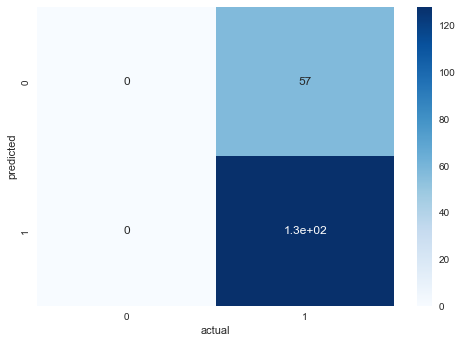

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.69      1.00      0.82       128

    accuracy                           0.69       185
   macro avg       0.35      0.50      0.41       185
weighted avg       0.48      0.69      0.57       185

accuracy score is :  0.6918918918918919
recall score is :  1.0
precison score is : 0.6918918918918919
----------------------------------------------------------------------
RandomForestClassifier(n_estimators=44)
model name  :   RandomForestClassifier(n_estimators=44)


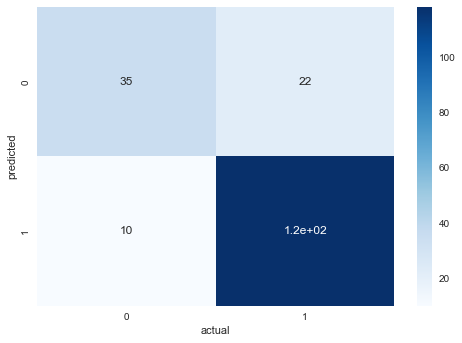

              precision    recall  f1-score   support

           0       0.78      0.61      0.69        57
           1       0.84      0.92      0.88       128

    accuracy                           0.83       185
   macro avg       0.81      0.77      0.78       185
weighted avg       0.82      0.83      0.82       185

accuracy score is :  0.827027027027027
recall score is :  0.921875
precison score is : 0.8428571428571429
----------------------------------------------------------------------
DecisionTreeClassifier(max_depth=4)
model name  :   DecisionTreeClassifier(max_depth=4)


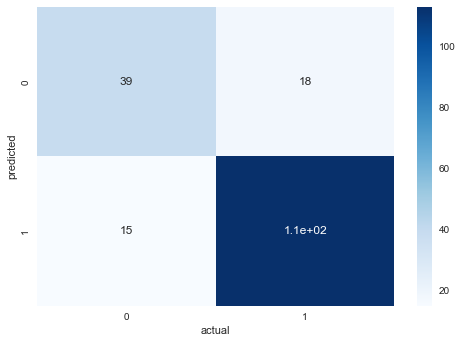

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        57
           1       0.86      0.88      0.87       128

    accuracy                           0.82       185
   macro avg       0.79      0.78      0.79       185
weighted avg       0.82      0.82      0.82       185

accuracy score is :  0.8216216216216217
recall score is :  0.8828125
precison score is : 0.8625954198473282
----------------------------------------------------------------------
AdaBoostClassifier(learning_rate=0.3, n_estimators=20, random_state=20)
model name  :   AdaBoostClassifier(learning_rate=0.3, n_estimators=20, random_state=20)


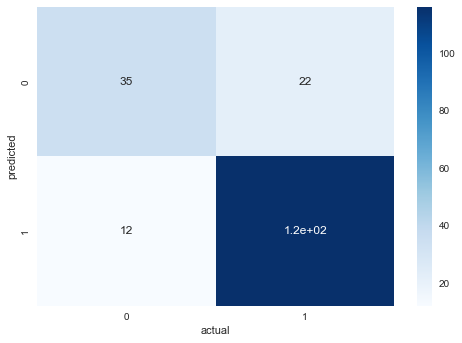

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        57
           1       0.84      0.91      0.87       128

    accuracy                           0.82       185
   macro avg       0.79      0.76      0.77       185
weighted avg       0.81      0.82      0.81       185

accuracy score is :  0.8162162162162162
recall score is :  0.90625
precison score is : 0.8405797101449275
----------------------------------------------------------------------


In [68]:
model3=[LogisticRegression(),RandomForestClassifier(n_estimators=44),DecisionTreeClassifier(max_depth=4),
        AdaBoostClassifier(n_estimators=20,learning_rate=0.3,random_state=20)]
for i in model3:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('model name  :  ',i)
    plt.style.use('seaborn')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.show()
    print(classification_report(y_test,y_pred))
    print('accuracy score is : ',accuracy_score(y_test,y_pred))
    print('recall score is : ',recall_score(y_test,y_pred))
    print('precison score is :',precision_score(y_test,y_pred))
    print('----------------------------------------------------------------------')

# Random forest classifier

for taking n_estimator with good score

In [69]:
from sklearn.ensemble import RandomForestClassifier
sc={'n_estimator':[],"score":[]}
for i in range(1,60):
    model=RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    s=model.score(x_test,y_test)
    sc['score'].append(s)
    sc['n_estimator'].append(i)

In [70]:
n=pd.DataFrame(sc)
n.style.background_gradient(cmap='gnuplot_r',low=1)


,n_estimator,score
0,1,0.627027
1,2,0.632432
2,3,0.740541
3,4,0.708108
4,5,0.794595
5,6,0.724324
6,7,0.789189
7,8,0.762162
8,9,0.767568
9,10,0.767568


In [71]:
model=RandomForestClassifier(n_estimators=53)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8054054054054054

In [72]:
x_test

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,...,mobile,enterprise,advertising,games_video,semiconductor,biotech,network_hosting,ecommerce,hardware,other_category
791,2.4192,3.0904,3,2,1310000,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
822,1.0000,2.1644,10,2,3500000,2,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
56,2.1644,4.7616,13,3,12000000,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
189,0.7397,1.1425,15,2,15700000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
385,1.4192,1.4466,5,2,1000000,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2.3178,4.2356,2,2,10600000,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
253,0.6712,0.6712,3,1,100000,2,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
418,0.6658,7.3753,6,6,37079000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1.6712,4.6849,14,3,5750000,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Adaboostingclassifier

In [73]:
model2=AdaBoostClassifier(n_estimators=50,learning_rate=0.2,random_state=20)

In [74]:
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.8216216216216217

In [75]:
x.columns

Index(['age_first_funding_year', 'age_last_funding_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'software', 'web', 'mobile',
       'enterprise', 'advertising', 'games_video', 'semiconductor', 'biotech',
       'network_hosting', 'ecommerce', 'hardware', 'other_category'],
      dtype='object')

In [76]:
x.head()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,...,mobile,enterprise,advertising,games_video,semiconductor,biotech,network_hosting,ecommerce,hardware,other_category
0,2.2493,3.0027,3,3,375000,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.1260,9.9973,9,4,40100000,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1.0329,1.0329,5,1,2600000,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.1315,5.3151,5,3,40000000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0000,1.6685,2,2,1300000,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# prediction & save model

In [77]:
model2.predict([[3,7,3,4,370000,2,0,1,1,0,0,0,0,44,1,1,0,0,0,0,0,0,0,0,0,0]])

array([1], dtype=int64)

In [78]:
from joblib import dump

In [79]:
dump(model2,"C:/Users/savad/Desktop/strtup/savedmodel1/mod.joblib")

['C:/Users/savad/Desktop/strtup/savedmodel1/mod.joblib']

In [80]:
# import pickle

In [81]:
# with open("C:/Users/savad/Desktop/strtup/savedmodel1/model.pkl", 'wb') as file:
#     pickle.dump(model2, file)